In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import gmaps
from scipy.stats import linregress

# Import API key
from api_keys import gkey

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Census data files
census_state_path_2017 = "Output/2017_cleaned_all_county.csv"
census_county_code_data = "Output/county_code_data.csv"

In [3]:
# Read the Census data
census_county_results_2017 = pd.read_csv(census_state_path_2017)
census_county_code = pd.read_csv(census_county_code_data)


In [4]:
census_county_results_2017.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,0,Alabama,Autauga County,55036,26899,28137,1485,41497,10401,165,...,313,602,25,17866,4870,1350,24,7539,11062,2861
1,1,Alabama,Baldwin County,203360,99527,103833,8947,168992,19319,1626,...,984,5013,27,72248,11548,5640,89,23996,32740,11184
2,2,Alabama,Barbour County,26201,13976,12225,1100,11973,12524,52,...,150,115,23,6578,1695,577,26,7126,11764,3248
3,3,Alabama,Bibb County,22580,12251,10329,541,16844,4967,90,...,138,122,30,6209,1421,514,24,3432,6006,1851
4,4,Alabama,Blount County,57667,28490,29177,5190,50400,865,173,...,85,448,35,17937,2544,855,21,8996,14647,2825


In [5]:
census_county_results_2017['County'] = census_county_results_2017['County'].str.replace(' County', '')
census_county_results_2017

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,0,Alabama,Autauga,55036,26899,28137,1485,41497,10401,165,...,313,602,25,17866,4870,1350,24,7539,11062,2861
1,1,Alabama,Baldwin,203360,99527,103833,8947,168992,19319,1626,...,984,5013,27,72248,11548,5640,89,23996,32740,11184
2,2,Alabama,Barbour,26201,13976,12225,1100,11973,12524,52,...,150,115,23,6578,1695,577,26,7126,11764,3248
3,3,Alabama,Bibb,22580,12251,10329,541,16844,4967,90,...,138,122,30,6209,1421,514,24,3432,6006,1851
4,4,Alabama,Blount,57667,28490,29177,5190,50400,865,173,...,85,448,35,17937,2544,855,21,8996,14647,2825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3215,Puerto Rico,Vega Baja Municipio,54754,26269,28485,52947,1697,54,0,...,85,128,31,10846,2747,612,28,23982,27048,9198
3216,3216,Puerto Rico,Vieques Municipio,8931,4351,4580,8546,357,0,0,...,0,49,14,1191,1197,538,0,3286,6090,1143
3217,3217,Puerto Rico,Villalba Municipio,23659,11510,12149,23588,47,23,0,...,0,192,28,4068,2075,714,13,11829,16064,5867
3218,3218,Puerto Rico,Yabucoa Municipio,35025,16984,18041,34989,35,0,0,...,141,7,30,4939,2434,496,0,18353,21750,8896


In [6]:
census_county_code.head()

,State Code,State,County,Region,Division,lat,lng
0,AK,Alaska,Bethel,West,Pacific,60.7287,-161.7730
1,AK,Alaska,Prince of Wales-Hyder,West,Pacific,55.5573,-132.4137
2,AK,Alaska,Kusilvak,West,Pacific,62.0911,-163.7209
3,AK,Alaska,Yukon-Koyukuk,West,Pacific,65.1746,-152.0684
4,AK,Alaska,Kenai Peninsula,West,Pacific,60.4997,-149.4464


In [7]:
census_2017_county_data = pd.merge(census_county_results_2017, census_county_code, how="left", on=["State","County"])
census_2017_county_data.head()


,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment,State Code,Region,Division,lat,lng
0,0,Alabama,Autauga,55036,26899,28137,1485,41497,10401,165,...,1350,24,7539,11062,2861,AL,South,East South Central,32.6793,-86.4607
1,1,Alabama,Baldwin,203360,99527,103833,8947,168992,19319,1626,...,5640,89,23996,32740,11184,AL,South,East South Central,30.2758,-87.7014
2,2,Alabama,Barbour,26201,13976,12225,1100,11973,12524,52,...,577,26,7126,11764,3248,AL,South,East South Central,31.7810,-85.5583
3,3,Alabama,Bibb,22580,12251,10329,541,16844,4967,90,...,514,24,3432,6006,1851,AL,South,East South Central,32.9597,-87.1334
4,4,Alabama,Blount,57667,28490,29177,5190,50400,865,173,...,855,21,8996,14647,2825,AL,South,East South Central,33.8789,-86.8241


In [8]:
census_2017 = pd.DataFrame(census_2017_county_data)
census_2017.head()

,Unnamed: 0,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment,State Code,Region,Division,lat,lng
0,0,Alabama,Autauga,55036,26899,28137,1485,41497,10401,165,...,1350,24,7539,11062,2861,AL,South,East South Central,32.6793,-86.4607
1,1,Alabama,Baldwin,203360,99527,103833,8947,168992,19319,1626,...,5640,89,23996,32740,11184,AL,South,East South Central,30.2758,-87.7014
2,2,Alabama,Barbour,26201,13976,12225,1100,11973,12524,52,...,577,26,7126,11764,3248,AL,South,East South Central,31.7810,-85.5583
3,3,Alabama,Bibb,22580,12251,10329,541,16844,4967,90,...,514,24,3432,6006,1851,AL,South,East South Central,32.9597,-87.1334
4,4,Alabama,Blount,57667,28490,29177,5190,50400,865,173,...,855,21,8996,14647,2825,AL,South,East South Central,33.8789,-86.8241


In [9]:
census_2017 = census_2017.dropna()

In [10]:
from ipywidgets.embed import embed_minimal_html
import gmaps
#Configure gmaps with API key
gmaps.configure(api_key=gkey)


fig = gmaps.figure(map_type="HYBRID")
locations = census_2017[["lat","lng"]]
income = census_2017["Income"]


heat_layer = gmaps.heatmap_layer(locations, weights=income,  
                                 dissipating=True, max_intensity=100000,
                                 point_radius=5)

fig.add_layer(heat_layer)
embed_minimal_html('png_folder/2017 Census Heatmap - Income by County.png', views=[fig])
fig


Figure(layout=FigureLayout(height='420px'))

In [11]:

fig = gmaps.figure(map_type="HYBRID")
locations = census_2017[["lat","lng"]]
pro = census_2017["Professional"]


heat_layer = gmaps.heatmap_layer(locations, weights=income,  
                                 dissipating=True, max_intensity=60000,
                                 point_radius=5)

fig.add_layer(heat_layer)
embed_minimal_html('png_folder/2017 Census Heatmap - Professional Sector by County.png', views=[fig])
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
#Data Collection for Census data summary
total_pop = census_county_results_2017["TotalPop"].sum()
men = census_county_results_2017["Men"].sum()/total_pop * 100
women= census_county_results_2017["Women"].sum()/total_pop * 100
employed_num = census_county_results_2017["Employed"].sum()
employed = census_county_results_2017["Employed"].sum()/total_pop * 100
income_avg = census_county_results_2017["Income"].mean()
professional = census_county_results_2017["Professional"].sum()/employed_num * 100
service = census_county_results_2017["Service"].sum()/employed_num * 100
office = census_county_results_2017["Office"].sum()/employed_num * 100
construction = census_county_results_2017["Construction"].sum()/employed_num * 100
production = census_county_results_2017["Production"].sum()/employed_num * 100
drive = census_county_results_2017["Drive"].sum()/employed_num * 100
carpool = census_county_results_2017["Carpool"].sum()/employed_num * 100
transit = census_county_results_2017["Transit"].sum()/employed_num * 100
walk = census_county_results_2017["Walk"].sum()/employed_num * 100
workathome = census_county_results_2017["WorkatHome"].sum()/employed_num * 100
privatework = census_county_results_2017["PrivateWork"].sum()/employed_num * 100
publicwork = census_county_results_2017["PublicWork"].sum()/employed_num * 100
selfemployed = census_county_results_2017["SelfEmployed"].sum()/employed_num * 100
familywork = census_county_results_2017["FamilyWork"].sum()/employed_num * 100
poverty = census_county_results_2017["Poverty"].sum()/employed_num * 100
childpoverty = census_county_results_2017["ChildPoverty"].sum()/total_pop * 100
unemployment = census_county_results_2017["Unemployment"].sum()/total_pop * 100

In [13]:
summary_2017_df = pd.DataFrame({"Total Pop": [total_pop],
                           "Men%": [men],
                           "Women%": [women],
                           "Income_Avg": [income_avg],
                           "Employed%": [employed],
                           "Professional%": [professional],
                           "Service%": [service],
                           "Office%": [office],
                           "Construction%": [construction],
                           "Production%": [production],
                           "Drive%": [drive],
                           "Carpool%": [carpool],
                           "Transit%": [transit],
                           "Walk%": [walk],
                           "WorkatHome%": [workathome],
                           "Privatework%": [privatework],
                           "Publicwork%": [publicwork],
                           "Selfemployed%": [selfemployed],
                           "Familywork%": [familywork],
                           "Poverty%": [poverty],
                           "Childpoverty%": [childpoverty],
                           "Selfemployed%": [selfemployed],
                           "Unemployment%": [unemployment]})           
                          
             
summary_2017_df .style.format({"Total Pop":"{:,}",
                         "Men%":"{:,.2f}%",
                         "Women%":"{:,.2f}%",
                         "Income_Avg":"${:,.2f}",
                         "Employed%":"{:,.2f}%",
                         "Professional%":"{:,.2f}%",
                         "Service%":"{:,.2f}%",
                         "Office%":"{:,.2f}%",
                         "Construction%":"{:,.2f}%",
                         "Production%":"{:,.2f}%",
                         "Drive%":"{:,.2f}%",
                         "Carpool%":"{:,.2f}%",
                         "Transit%":"{:,.2f}%",
                          "Walk%":"{:,.2f}%",
                          "WorkatHome%":"{:,.2f}%",
                          "Privatework%":"{:,.2f}%",
                          "Publicwork%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Familywork%":"{:,.2f}%",
                          "Poverty%":"{:,.2f}%",
                          "Childpoverty%":"{:,.2f}%",
                          "Selfemployed%":"{:,.2f}%",
                          "Unemployment%":"{:,.2f}%"})  

,Total Pop,Men%,Women%,Income_Avg,Employed%,Professional%,Service%,Office%,Construction%,Production%,Drive%,Carpool%,Transit%,Walk%,WorkatHome%,Privatework%,Publicwork%,Selfemployed%,Familywork%,Poverty%,Childpoverty%,Unemployment%
0,"324,473,370",49.21%,50.79%,"$48,994.97",46.73%,37.41%,17.99%,23.56%,8.88%,12.16%,76.46%,9.15%,5.13%,2.73%,4.71%,79.95%,13.90%,5.98%,0.16%,31.95%,20.61%,6.76%


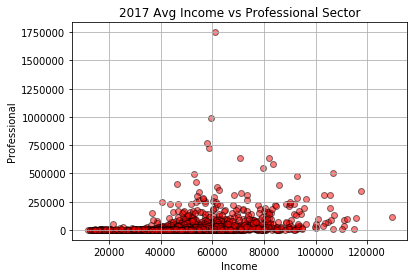

In [14]:
plt.scatter(census_county_results_2017["Income"],census_county_results_2017["Professional"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Professional")
plt.title(f"2017 Avg Income vs Professional Sector")
plt.savefig("png_folder/2017 Avg Income vs. Professional Sector.png")
plt.grid()
plt.show()

The r-squared is: 0.09251736302665224


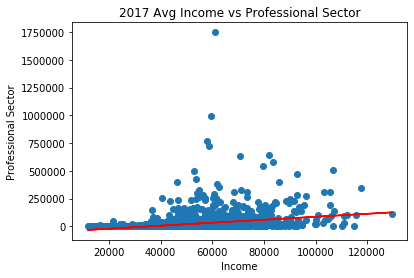

In [15]:
x_value = census_county_results_2017["Income"]
y_value = census_county_results_2017["Professional"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("2017 Avg Income vs Professional Sector")
plt.xlabel("Income")
plt.ylabel("Professional Sector")
plt.savefig("png_folder/2017 Avg Income vs. Professional Sector Latitude Linear Regression.png")
plt.show()